In [167]:
import sklearn
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve

In [168]:
# KNN

knn_predictions = pd.read_csv("../predictions/knn_predictions.csv")
knn_over_predictions = pd.read_csv("../predictions/knn_over_predictions.csv")
knn_under_predictions = pd.read_csv("../predictions/knn_under_predictions.csv")

# DecisionTree 

dt_predictions = pd.read_csv("../predictions/decisionTree_predictions.csv")
dt_over_predictions = pd.read_csv("../predictions/decisionTree_over_predictions.csv")
dt_under_predictions = pd.read_csv("../predictions/decisionTree_under_predictions.csv")

# SVM 

svm_predictions = pd.read_csv("../predictions/svm_predictions.csv")
svm_over_predictions = pd.read_csv("../predictions/svm_over_predictions.csv")
svm_under_predictions = pd.read_csv("../predictions/svm_under_predictions.csv")

# RandomForest

rf_predictions = pd.read_csv("../predictions/randomForest_predictions.csv")
rf_over_predictions = pd.read_csv("../predictions/randomForest_over_predictions.csv")
rf_under_predictions = pd.read_csv("../predictions/randomForest_under_predictions.csv")

In [169]:
# KNN

y_test_knn = knn_predictions['Y_true']
y_preds_knn = knn_predictions['Y_Pred_Prob']

y_test_knn_over = knn_over_predictions['Y_true']
y_preds_knn_over = knn_over_predictions['Y_Pred_Prob']

y_test_knn_under = knn_under_predictions['Y_true']
y_preds_knn_under = knn_under_predictions['Y_Pred_Prob']

# DecisionTree

y_test_dt = dt_predictions['Y_true']
y_preds_dt = dt_predictions['Y_Pred_Prob']

y_test_dt_over = dt_over_predictions['Y_true']
y_preds_dt_over = dt_over_predictions['Y_Pred_Prob']

y_test_dt_under = dt_under_predictions['Y_true']
y_preds_dt_under = dt_under_predictions['Y_Pred_Prob']

# SVM

y_test_svm = svm_predictions['Y_true']
y_preds_svm = svm_predictions['Y_Pred_Prob']

y_test_svm_over = svm_over_predictions['Y_true']
y_preds_svm_over = svm_over_predictions['Y_Pred_Prob']

y_test_svm_under = svm_under_predictions['Y_true']
y_preds_svm_under = svm_under_predictions['Y_Pred_Prob']

# Random Forest

y_test_rf = rf_predictions['Y_true']
y_preds_rf = rf_predictions['Y_Pred_Prob']

y_test_rf_over = rf_over_predictions['Y_true']
y_preds_rf_over = rf_over_predictions['Y_Pred_Prob']

y_test_rf_under = rf_under_predictions['Y_true']
y_preds_rf_under = rf_under_predictions['Y_Pred_Prob']

# ROC Curve 

In [170]:
# ROC area for each class

auc_knn = roc_auc_score(y_test_knn, y_preds_knn)
print('AUC KNN: %.6f' % auc_knn)

auc_svm = roc_auc_score(y_test_svm, y_preds_svm)
print('AUC SVM: %.6f' % auc_svm)

auc_dt = roc_auc_score(y_test_dt, y_preds_dt)
print('AUC Decision Tree: %.6f' % auc_dt)

auc_rf = roc_auc_score(y_test_rf, y_preds_rf)
print('AUC Random Forest: %.6f' % auc_rf)

AUC KNN: 0.589235
AUC SVM: 0.495973
AUC Decision Tree: 0.926915
AUC Random Forest: 0.941136


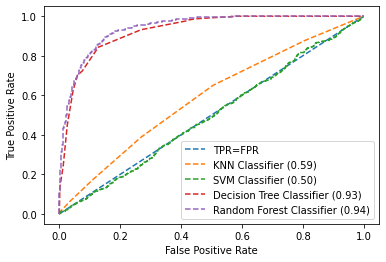

In [171]:
# Generating ROC Curve Plot

# For the straight line
straight_probs = [0 for _ in range(len(y_test_knn))]
straight_fpr, straight_tpr, _ = roc_curve(y_test_knn, straight_probs)
pyplot.plot(straight_fpr, straight_tpr, linestyle='--', label="TPR=FPR")

# For KNN Classifier
knn_fpr, knn_tpr, _ = roc_curve(y_test_knn, y_preds_knn)
pyplot.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN Classifier ({:.2f})'.format(auc_knn))

# For SVM Classifier
svm_fpr, svm_tpr, _ = roc_curve(y_test_svm, y_preds_svm)
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM Classifier ({:.2f})'.format(auc_svm))

# For Decition Tree Classifier
dt_fpr, dt_tpr, _ = roc_curve(y_test_dt, y_preds_dt)
pyplot.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree Classifier ({:.2f})'.format(auc_dt))

# For Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test_rf, y_preds_rf)
pyplot.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest Classifier ({:.2f})'.format(auc_rf))

# To Plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.savefig("ROCCurve.png")
pyplot.show()

# Oversampling

In [172]:
# ROC area for each class

auc_knn = roc_auc_score(y_test_knn_over, y_preds_knn_over)
print('AUC KNN: %.6f' % auc_knn)

auc_svm = roc_auc_score(y_test_svm_over, y_preds_svm_over)
print('AUC SVM: %.6f' % auc_svm)

auc_dt = roc_auc_score(y_test_dt_over, y_preds_dt_over)
print('AUC Decision Tree: %.6f' % auc_dt)

auc_rf = roc_auc_score(y_test_rf_over, y_preds_rf_over)
print('AUC Random Forest: %.6f' % auc_rf)

AUC KNN: 0.772975
AUC SVM: 0.507623
AUC Decision Tree: 0.929590
AUC Random Forest: 0.775339


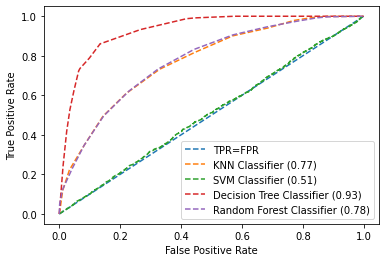

In [173]:
# Generating ROC Curve Plot

# For the straight line
straight_probs = [0 for _ in range(len(y_test_knn))]
straight_fpr, straight_tpr, _ = roc_curve(y_test_knn, straight_probs)
pyplot.plot(straight_fpr, straight_tpr, linestyle='--', label="TPR=FPR")

# For KNN Classifier
knn_fpr, knn_tpr, _ = roc_curve(y_test_knn_over, y_preds_knn_over)
pyplot.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN Classifier ({:.2f})'.format(auc_knn))

# For SVM Classifier
svm_fpr, svm_tpr, _ = roc_curve(y_test_svm_over, y_preds_svm_over)
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM Classifier ({:.2f})'.format(auc_svm))

# For Decition Tree Classifier
dt_fpr, dt_tpr, _ = roc_curve(y_test_dt_over, y_preds_dt_over)
pyplot.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree Classifier ({:.2f})'.format(auc_dt))

# For Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test_rf_over, y_preds_rf_over)
pyplot.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest Classifier ({:.2f})'.format(auc_rf))

# To Plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.savefig("ROCCurve_over.png")
pyplot.show()

# Undersampling

In [174]:
# ROC area for each class

auc_knn = roc_auc_score(y_test_knn_under, y_preds_knn_under)
print('AUC KNN: %.6f' % auc_knn)

auc_svm = roc_auc_score(y_test_svm_under, y_preds_svm_under)
print('AUC SVM: %.6f' % auc_svm)

auc_dt = roc_auc_score(y_test_dt_under, y_preds_dt_under)
print('AUC Decision Tree: %.6f' % auc_dt)

auc_rf = roc_auc_score(y_test_rf_under, y_preds_rf_under)
print('AUC Random Forest: %.6f' % auc_rf)

AUC KNN: 0.599307
AUC SVM: 0.507971
AUC Decision Tree: 0.921857
AUC Random Forest: 0.942619


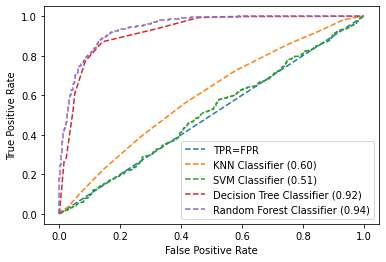

In [175]:
# Generating ROC Curve Plot

# For the straight line
straight_probs = [0 for _ in range(len(y_test_knn))]
straight_fpr, straight_tpr, _ = roc_curve(y_test_knn, straight_probs)
pyplot.plot(straight_fpr, straight_tpr, linestyle='--', label="TPR=FPR")

# For KNN Classifier
knn_fpr, knn_tpr, _ = roc_curve(y_test_knn_under, y_preds_knn_under)
pyplot.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN Classifier ({:.2f})'.format(auc_knn))

# For SVM Classifier
svm_fpr, svm_tpr, _ = roc_curve(y_test_svm_under, y_preds_svm_under)
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM Classifier ({:.2f})'.format(auc_svm))

# For Decition Tree Classifier
dt_fpr, dt_tpr, _ = roc_curve(y_test_dt_under, y_preds_dt_under)
pyplot.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree Classifier ({:.2f})'.format(auc_dt))

# For Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test_rf_under, y_preds_rf_under)
pyplot.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest Classifier ({:.2f})'.format(auc_rf))

# To Plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.savefig("ROCCurve_under.png")
pyplot.show()

# Precision-Recall Curve

In [176]:
precision_knn, recall_knn, _ = precision_recall_curve(y_test_knn, y_preds_knn)
precision_svm, recall_svm, _ = precision_recall_curve(y_test_svm, y_preds_svm)
precision_dt, recall_dt, _ = precision_recall_curve(y_test_dt, y_preds_dt)
precision_rf, recall_rf, _ = precision_recall_curve(y_test_rf, y_preds_rf)

no_skill = len(y_test_knn[y_test_knn==1]) / len(y_test_knn)

auc_score_knn = auc(recall_knn, precision_knn)
auc_score_dt = auc(recall_dt, precision_dt)
auc_score_svm = auc(recall_svm, precision_svm)
auc_score_rf = auc(recall_rf, precision_rf)

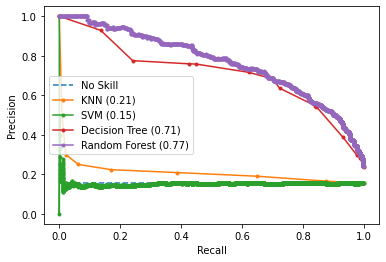

In [177]:
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

pyplot.plot(recall_knn, precision_knn, marker='.', label='KNN ({:.2f})'.format(auc_score_knn))
pyplot.plot(recall_svm, precision_svm, marker='.', label='SVM ({:.2f})'.format(auc_score_svm))
pyplot.plot(recall_dt, precision_dt, marker='.', label='Decision Tree ({:.2f})'.format(auc_score_dt))
pyplot.plot(recall_rf, precision_rf, marker='.', label='Random Forest ({:.2f})'.format(auc_score_rf))

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.savefig("PRCurve.png")
pyplot.show()